# import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
data = pd.read_csv('stock_details_5_years.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA


# Describe The Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  object 
 1   Open          602962 non-null  float64
 2   High          602962 non-null  float64
 3   Low           602962 non-null  float64
 4   Close         602962 non-null  float64
 5   Volume        602962 non-null  int64  
 6   Dividends     602962 non-null  float64
 7   Stock Splits  602962 non-null  float64
 8   Company       602962 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 41.4+ MB


In [4]:
for i in list(data.columns):
    print("{} -- {}".format(i, data[i].value_counts().shape[0]))

Date -- 1258
Open -- 510592
High -- 514315
Low -- 513389
Close -- 484353
Volume -- 170929
Dividends -- 960
Stock Splits -- 40
Company -- 491


In [5]:
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64

In [6]:
print(data.describe())

                Open           High            Low          Close  \
count  602962.000000  602962.000000  602962.000000  602962.000000   
mean      140.074711     141.853492     138.276316     140.095204   
std       275.401725     279.003191     271.895276     275.477969   
min         1.052425       1.061195       1.026114       1.034884   
25%        39.566159      40.056222      39.058151      39.563746   
50%        79.177964      80.125563      78.193820      79.177906   
75%       157.837190     159.746317     155.841609     157.847153   
max      6490.259766    6525.000000    6405.000000    6509.350098   

             Volume     Dividends   Stock Splits  
count  6.029620e+05  602962.00000  602962.000000  
mean   5.895601e+06       0.00731       0.000344  
std    1.381596e+07       0.12057       0.050607  
min    0.000000e+00       0.00000       0.000000  
25%    1.031500e+06       0.00000       0.000000  
50%    2.228700e+06       0.00000       0.000000  
75%    5.277400e+06  

# Company Analysis

Number of unique companies: 491
Top 10 companies by frequency:


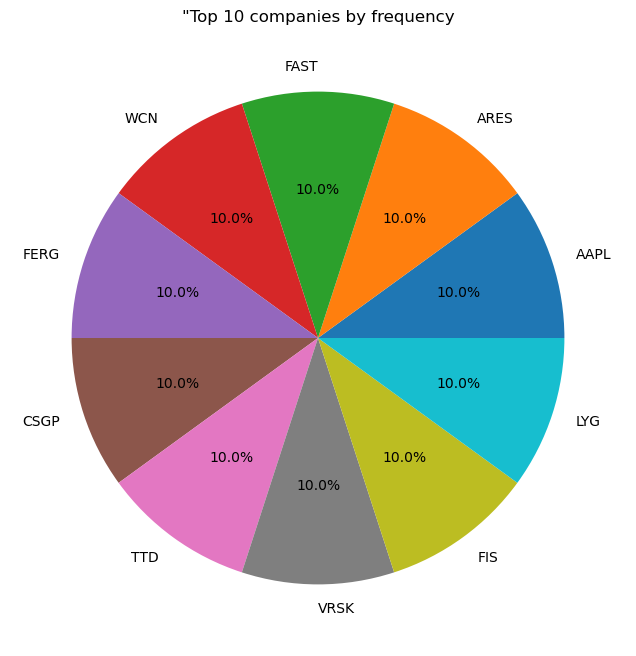

In [7]:
unique_companies = data['Company'].nunique()
print(f"Number of unique companies: {unique_companies}")

# Top companies by frequency
top_companies = data['Company'].value_counts().head(10)
print("Top 10 companies by frequency:")

company_distribution = data['Company'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(company_distribution, labels=company_distribution.index, autopct='%1.1f%%')
plt.title('"Top 10 companies by frequency')
plt.show()

# Volume Analysis

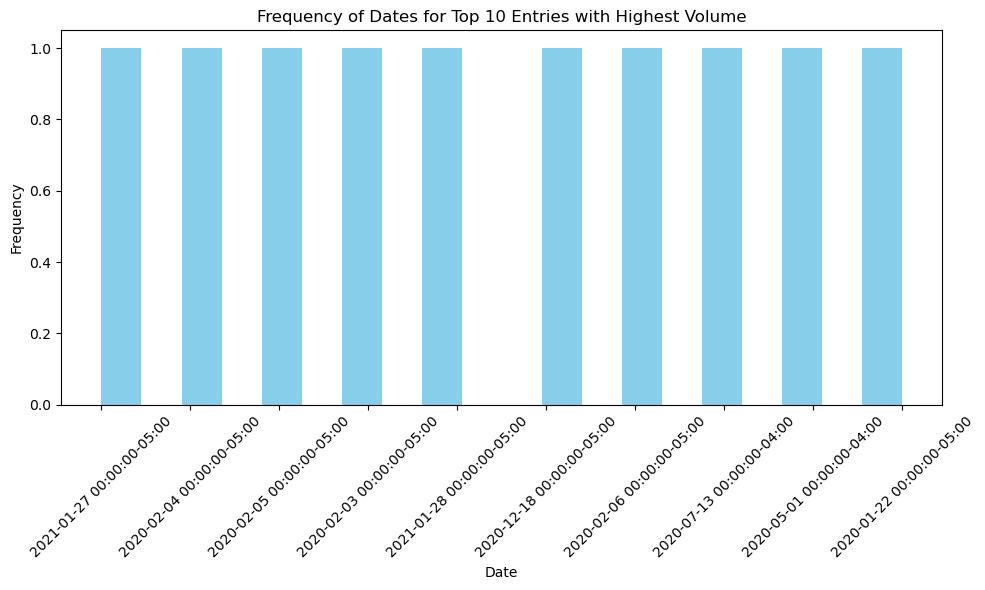

In [8]:
# Get the top 10 entries in 'Volume'
top_10_volume = data.nlargest(10, 'Volume')

# Extract 'Date' values for the top 10 entries
top_10_dates = top_10_volume['Date']

# Create a histogram for 'Date'
plt.figure(figsize=(10, 6))
plt.hist(top_10_dates, bins=20, color='skyblue')  # Adjust bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Frequency of Dates for Top 10 Entries with Highest Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()


# Select Company To Describe

In [9]:
# Assuming 'data' is your dataset containing columns like 'Date', 'Volume', and 'Company'
while True:
    unique_companies = data['Company'].unique()
    print("Available companies:")
    print(', '.join(unique_companies))  # Display available companies for reference

    # Filter the data for a specific company (for example, 'GOOGL')
    selected_company = input("Enter the name of the company (or type 'exit' to quit): ")

    if selected_company.lower() == 'exit':
        print("Exiting the program.")
        break

    company_data = data[data['Company'] == selected_company]

    if company_data.empty:
        print(f"No data found for '{selected_company}'. Please enter a valid company.")
        continue

    # Get the top 10 dates with the highest volume for the selected company
    top_10_dates = company_data.nlargest(10, 'Volume')

    # Plotting bar plot for the top 10 dates and their corresponding volumes for the selected company
    plt.figure(figsize=(12, 10))
    sns.barplot(x='Date', y='Volume', data=top_10_dates, palette='viridis')
    plt.title(f'Top 10 Dates with Highest Volume for: {selected_company}')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show plot
    plt.show()


Available companies:
AAPL, MSFT, GOOGL, AMZN, NVDA, META, TSLA, LLY, V, TSM, UNH, AVGO, NVO, JPM, WMT, XOM, MA, JNJ, PG, ORCL, HD, ADBE, ASML, CVX, COST, TM, MRK, KO, ABBV, BAC, PEP, FMX, CRM, SHEL, ACN, NFLX, MCD, AMD, LIN, NVS, AZN, CSCO, TMO, BABA, INTC, PDD, SAP, ABT, TMUS, PFE, DIS, NKE, CMCSA, DHR, INTU, TTE, WFC, VZ, BHP, HDB, HSBC, PM, QCOM, IBM, AMGN, TXN, NOW, BA, COP, UNP, BX, SPGI, UPS, GE, MS, HON, CAT, AMAT, BUD, AXP, RY, NEE, UL, SNY, RTX, T, LOW, SBUX, RIO, TD, SYK, BLK, LMT, GS, ELV, ISRG, BKNG, SONY, MDT, PLD, SCHW, DE, MUFG, BP, TJX, BMY, PBR, MMC, MDLZ, AMT, PGR, LRCX, SHOP, ADP, EQNR, GILD, CB, ADI, PANW, VRTX, ETN, UBS, CVS, C, REGN, KKR, MU, SNPS, CI, MELI, BSX, ZTS, IBN, DEO, FI, CME, SO, EQIX, CDNS, KLAC, SLB, MO, CNI, ENB, NTES, INFY, ITW, RELX, GSK, EOG, CNQ, BTI, SHW, NOC, DUK, WDAY, BDX, ANET, WM, GD, HCA, RACE, STLA, MCO, CP, SAN, SMFG, AON, FDX, VALE, CL, TRI, PYPL, ICE, CSX, ITUB, HUM, MCK, TGT, CMG, MAR, APD, CHTR, USB, BN, BMO, EPD, CTAS, BBVA, SCCO, P

# Select To Describe (Open, High, Low, Close) Columns

Available columns: Open, High, Low, Close
Enter the name of the column (or type 'exit' to quit): Low

Top 10 rows based on 'Low':
                             Date         Open         High          Low  \
557330  2023-07-19 00:00:00-04:00  6449.790039  6469.680176  6405.000000   
573010  2023-09-01 00:00:00-04:00  6422.200195  6525.000000  6393.919922   
556840  2023-07-18 00:00:00-04:00  6402.240234  6470.870117  6391.000000   
556350  2023-07-17 00:00:00-04:00  6368.390137  6445.000000  6349.370117   
559780  2023-07-26 00:00:00-04:00  6373.870117  6443.899902  6340.500000   
555860  2023-07-14 00:00:00-04:00  6358.250000  6425.509766  6339.740234   
572520  2023-08-31 00:00:00-04:00  6365.350098  6416.200195  6335.500000   
555370  2023-07-13 00:00:00-04:00  6367.770020  6391.100098  6322.399902   
575460  2023-09-11 00:00:00-04:00  6350.009766  6439.899902  6320.000000   
563700  2023-08-07 00:00:00-04:00  6321.000000  6391.419922  6305.000000   

              Close  Volume  Divi

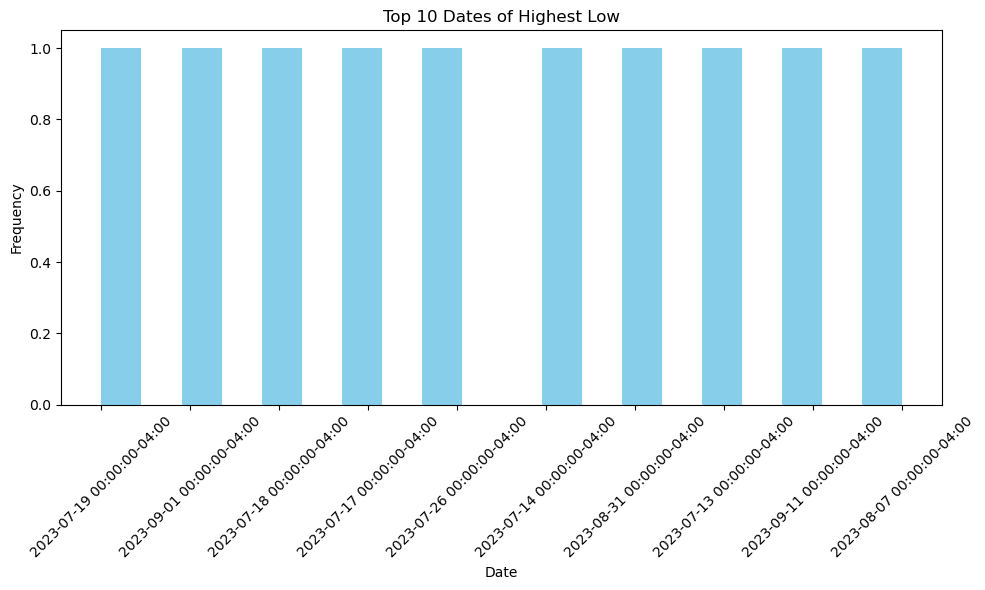

Available columns: Open, High, Low, Close
Enter the name of the column (or type 'exit' to quit): exit


In [10]:
while True:
    # Display available columns for user selection
    print("Available columns: Open, High, Low, Close")
    selected_column = input("Enter the name of the column (or type 'exit' to quit): ")

    if selected_column.lower() == 'exit':
        break  # Exit the loop if the user inputs 'exit'

    # Check if the selected column exists in the dataset
    if selected_column not in data.columns:
        print("Invalid column name. Please choose from: Open, High, Low, Close")
    else:
        # Get top 10 rows for the selected column
        top_10_rows = data.nlargest(10, selected_column)

        # Display the top 10 rows in a table
        print(f"\nTop 10 rows based on '{selected_column}':")
        print(top_10_rows)

        # Plotting the top 10 frequencies in a histogram using Matplotlib
        plt.figure(figsize=(10, 6))
        plt.hist(top_10_rows['Date'], bins=20, color='skyblue')
        plt.title(f'Top 10 Dates of Highest {selected_column}')
        plt.xlabel('Date')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
